In [1]:
### Preface ###
# We will use KNN to classify income whether <=50K or >50K by these numerical attribues "age, education-num, capital-gain, capital-loss, hours-per-week".
# I didn't include transformed nominal attributes (Eg. sex).

### references materials ###
# algorithm, https://medium.com/analytics-vidhya/easy-knn-algorithm-using-scikit-learn-7f6e256c9453
# n of KNN, https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
# multiple attributes, https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711

In [2]:
# import library, loading dataset

import numpy as np
import pandas as pd
data = pd.read_csv("census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
# drop non-numerical (categorical) columns

drop_columns = ['workclass', 'education_level','marital-status','occupation','relationship','race','sex','native-country']
data = data.drop(columns= drop_columns, axis = 1)
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13.0,2174.0,0.0,40.0,<=50K
1,50,13.0,0.0,0.0,13.0,<=50K
2,38,9.0,0.0,0.0,40.0,<=50K
3,53,7.0,0.0,0.0,40.0,<=50K
4,28,13.0,0.0,0.0,40.0,<=50K


In [4]:
# data preparation
data_prep = data

# normalized numerical into 0-1 with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data_prep[numerical] = scaler.fit_transform(data[numerical])

# discretized (bining) age into 4 grouped where '0-15' = 0, '16-30' = 1, '31-45' = 2, '46-60' = 3, '60+' = 4
data_prep = data_prep.rename(columns={'age' : 'age-group'} )
data_prep['age-group'] = pd.cut(data_prep['age-group'], bins=[0, 15, 30, 45, 60, 200],  labels=[0, 1, 2, 3, 4])
data_prep.head()

,age-group,education-num,capital-gain,capital-loss,hours-per-week,income
0,2,0.800000,0.02174,0.0,0.397959,<=50K
1,3,0.800000,0.00000,0.0,0.122449,<=50K
2,2,0.533333,0.00000,0.0,0.397959,<=50K
3,3,0.400000,0.00000,0.0,0.397959,<=50K
4,1,0.800000,0.00000,0.0,0.397959,<=50K


In [5]:
# import KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# select parameter (x) and target (y)
x=data_prep.iloc[:,:-1] #all parameters
y=data_prep['income'] #target



In [6]:
# set up k of KNN and n of cross validation
scores = {} # dictionary, key is n of KNN and value is list of score
k_range = range(1,11)
cross_count = range(1,6)

# loop though each k
for k in k_range:
    score_list = [] # value of each k
    print('k',k)
    # set up k KNN
    knn = KNeighborsClassifier(n_neighbors = k)
    # loop though each cross
    for cross in cross_count:
        print('cross',cross)
        # begin split 80/20
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
        # KNN fit
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        score_list.append(metrics.accuracy_score(y_test, y_pred))
    print(score_list)  
    scores[k] = score_list

k 1
cross 1
cross 2
cross 3
cross 4
cross 5
[0.7317855168601437, 0.7813156440022112, 0.7495854063018242, 0.7645107794361525, 0.7638474295190714]
k 2
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8056384742951908, 0.8011055831951355, 0.7959093421779989, 0.8036484245439469, 0.7840796019900498]
k 3
cross 1
cross 2
cross 3
cross 4
cross 5
[0.7922609176340519, 0.8119402985074626, 0.7751243781094528, 0.7781094527363184, 0.8036484245439469]
k 4
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8093974571586512, 0.8076285240464345, 0.8060807075732449, 0.806522940851299, 0.8074074074074075]
k 5
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8079601990049752, 0.8074074074074075, 0.7951354339414041, 0.7984521835268104, 0.7921503593145384]
k 6
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8121614151464898, 0.819126589275843, 0.7994472084024323, 0.8070757324488668, 0.811608623548922]
k 7
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8165837479270315, 0.7924820342730791, 0.8105030403537866, 0.8204532891100055, 0.803648

In [7]:
# preview accuracy score for each K
scoredf = pd.DataFrame(data=scores)
scoredf.columns = ['K' + str(x) for i, x in enumerate(scoredf)]
scoredf

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,0.731786,0.805638,0.792261,0.809397,0.807960,0.812161,0.816584,0.812161,0.808402,0.813820
1,0.781316,0.801106,0.811940,0.807629,0.807407,0.819127,0.792482,0.818684,0.812714,0.810171
2,0.749585,0.795909,0.775124,0.806081,0.795135,0.799447,0.810503,0.820232,0.801216,0.819458
3,0.764511,0.803648,0.778109,0.806523,0.798452,0.807076,0.820453,0.811940,0.811388,0.811498
4,0.763847,0.784080,0.803648,0.807407,0.792150,0.811609,0.803648,0.807076,0.768712,0.811056


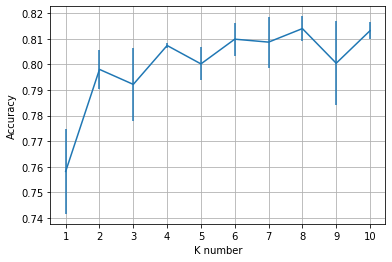

In [8]:
# import matplotlib library
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# calculate SD for error bar (I use 1±SD)
x = k_range
y = [np.mean(scores[k]) for k in k_range]
error = [np.std(scores[k]) for k in k_range]

# plot
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=error)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.show()

In [9]:
# select the best k number
best_K = y.index(max(y))
print('The best K number from 1 to 10 is:', best_K+1)
print('Accuracy of K =', best_K+1, 'is', y[best_K])

The best K number from 1 to 10 is: 8
Accuracy of K = 8 is 0.8140187949143172


In [10]:
# confusion matrix
# https://en.wikipedia.org/wiki/Confusion_matrix
# 4 cells of true positive (TP), true negative (TN), false positive (FP), false negative (FN)


![title](confusion_lecture.png)

In [12]:
# select parameter (x) and target (y)
x=data_prep.iloc[:,:-1] #all parameters
y=data_prep['income'] #target

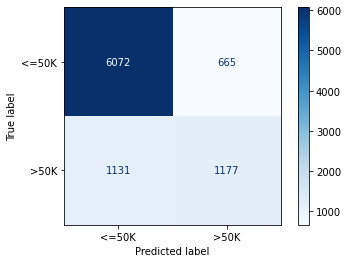

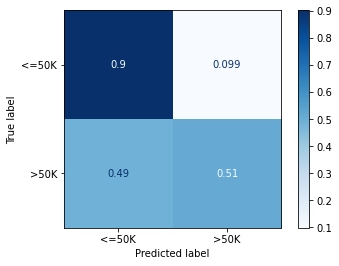

In [13]:
# confusion matrix for k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

# count and plot with sklearn
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)


In [14]:
# conventional confusion matrix
# confusion matrix for k = 5
matrix = pd.DataFrame()
matrix['true-income'] = y_test
matrix['predict-income'] = y_pred
matrix.head()

,true-income,predict-income
14826,<=50K,<=50K
33552,>50K,<=50K
19357,<=50K,<=50K
5165,<=50K,<=50K
4639,<=50K,>50K


In [15]:
matrix.count()

true-income       9045
predict-income    9045
dtype: int64

In [16]:
# predict >50K
TP = len(matrix[(matrix['true-income'] == '>50K') & (matrix['predict-income'] == '>50K')])
FN = len(matrix[(matrix['true-income'] == '>50K') & (matrix['predict-income'] == '<=50K')])
FP = len(matrix[(matrix['true-income'] == '<=50K') & (matrix['predict-income'] == '>50K')])
TN = len(matrix[(matrix['true-income'] == '<=50K') & (matrix['predict-income'] == '<=50K')])

print('True positive, >50K and we predict >50K is ', TP)
print('False negative, >50K but we predict <=50K is ', FN)
print('False positive, <=50K but we predict >50K is ', FP)
print('True negative, <=50K and we predict >50K is ', TN)

True positive, &gt;50K and we predict &gt;50K is  1177
False negative, &gt;50K but we predict &lt;=50K is  1131
False positive, &lt;=50K but we predict &gt;50K is  665
True negative, &lt;=50K and we predict &gt;50K is  6072


![title](confusion_result.png)